In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('./data/FanGraphs Leaderboard 05-31.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 22 columns):
Name        284 non-null object
Team        284 non-null object
G           284 non-null int64
PA          284 non-null int64
HR          284 non-null int64
R           284 non-null int64
RBI         284 non-null int64
SB          284 non-null int64
BB%         284 non-null object
K%          284 non-null object
ISO         284 non-null float64
BABIP       284 non-null float64
AVG         284 non-null float64
OBP         284 non-null float64
SLG         284 non-null float64
wOBA        284 non-null float64
wRC+        284 non-null int64
BsR         284 non-null float64
Off         284 non-null float64
Def         284 non-null float64
WAR         284 non-null float64
playerid    284 non-null int64
dtypes: float64(10), int64(8), object(4)
memory usage: 48.9+ KB


In [4]:
df['K%'] = df['K%'].str.replace('%','').str.strip().astype(float) / 100
df['BB%'] = df['BB%'].str.replace('%','').str.strip().astype(float) / 100


In [5]:
df.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Cody Bellinger,Dodgers,55,237,20,50,52,7,0.143,0.131,...,0.377,0.464,0.754,0.488,212,0.5,34.6,2.2,4.4,15998
1,Mike Trout,Angels,52,232,12,38,33,6,0.220,0.159,...,0.283,0.457,0.572,0.424,172,2.7,23.9,3.3,3.5,10155
2,Christian Yelich,Brewers,50,218,21,44,45,10,0.156,0.174,...,0.313,0.427,0.715,0.449,180,1.5,24.0,-0.9,3.0,11477
3,Paul DeJong,Cardinals,55,239,8,41,26,4,0.121,0.172,...,0.284,0.385,0.495,0.376,135,3.5,14.4,6.2,2.8,18015
4,Alex Bregman,Astros,55,242,17,37,38,2,0.161,0.145,...,0.270,0.393,0.571,0.400,157,-1.3,16.0,3.4,2.8,17678


$WAR = \frac{\sum (Batting Runs + Base Running Runs + Fielding Runs + Positional Adjustment + League Adjustment +Replacement Runs}{Runs Per Win}$

In [6]:
df['BB/K'] = df['BB%'] / df['K%']

In [7]:
player_group = df.groupby(['playerid', 'Name'])

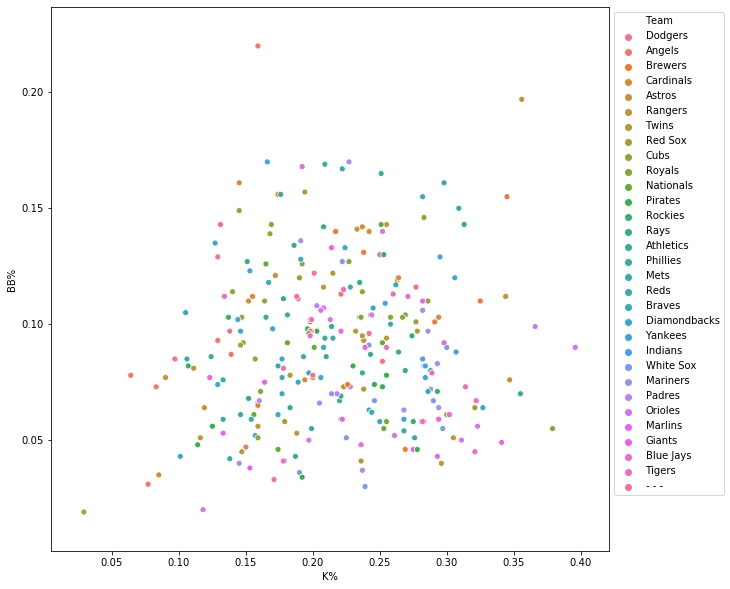

In [8]:
fig = plt.figure(figsize=(10, 10))

sns.scatterplot('K%', 'BB%', data=df, hue='Team', cmap='jet', legend='full')
plt.legend(bbox_to_anchor=(1,1), scatterpoints=1);

In [9]:
cuts = np.percentile(df['WAR'], [25, 50, 75])
top_25 = df[df['WAR'] >= cuts[2]]

top_25.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid,BB/K
0,Cody Bellinger,Dodgers,55,237,20,50,52,7,0.143,0.131,...,0.464,0.754,0.488,212,0.5,34.6,2.2,4.4,15998,1.091603
1,Mike Trout,Angels,52,232,12,38,33,6,0.220,0.159,...,0.457,0.572,0.424,172,2.7,23.9,3.3,3.5,10155,1.383648
2,Christian Yelich,Brewers,50,218,21,44,45,10,0.156,0.174,...,0.427,0.715,0.449,180,1.5,24.0,-0.9,3.0,11477,0.896552
3,Paul DeJong,Cardinals,55,239,8,41,26,4,0.121,0.172,...,0.385,0.495,0.376,135,3.5,14.4,6.2,2.8,18015,0.703488
4,Alex Bregman,Astros,55,242,17,37,38,2,0.161,0.145,...,0.393,0.571,0.400,157,-1.3,16.0,3.4,2.8,17678,1.110345


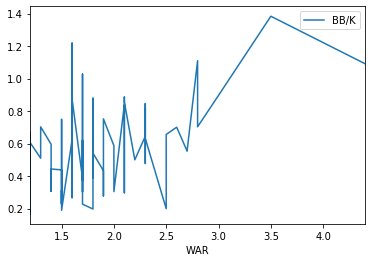

In [10]:
top_25.plot('WAR', 'BB/K')

In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
df.columns

Index(['Name', 'Team', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB%', 'K%', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off', 'Def',
       'WAR', 'playerid', 'BB/K'],
      dtype='object')

In [19]:
X = df[['HR', 'R', 'RBI', 'SB', 'BB%', 'K%', 'ISO',
       'BABIP', 'AVG', 'OBP', 'SLG']]

y = df.Off

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
cf = pd.DataFrame(model.coef_, X.columns, columns=['Coefs'])
cf

,Coefs
HR,0.427682
R,0.002922
RBI,-0.021145
SB,0.164452
BB%,3.393909
K%,-23.502806
ISO,-32.824153
BABIP,52.797754
AVG,-105.345421
OBP,74.575417


In [29]:
predicts = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, mean_squared_error, explained_variance_score 

In [32]:
#accuracy_score(y_test, predicts)

In [37]:
len(predicts)

71

In [36]:
len(y_test)

71

In [38]:
mean_squared_error(y_test, predicts)

5.167814465581458

In [39]:
explained_variance_score(y_test, predicts)

0.934913578923998

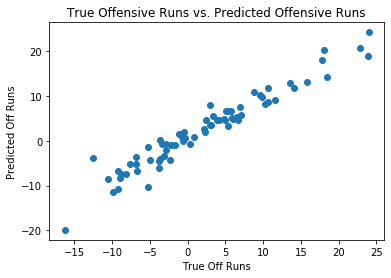

In [47]:
fig, ax = plt.subplots()

ax.scatter(y_test, predicts)
ax.set_xlabel('True Off Runs')
ax.set_ylabel('Predicted Off Runs')
ax.set_title('True Offensive Runs vs. Predicted Offensive Runs');

In [48]:
import pickle

In [49]:
pickle.dump(model, open('firstLR_model.pickle', 'wb'))

In [59]:
pfile = open('firstLR_model.pickle', 'rb')

In [60]:
p_model = pickle.load(pfile)
pfile.close()

In [61]:
p_model.coef_

array([ 4.27682335e-01,  2.92157090e-03, -2.11446153e-02,  1.64451939e-01,
        3.39390943e+00, -2.35028059e+01, -3.28241533e+01,  5.27977543e+01,
       -1.05345421e+02,  7.45754169e+01,  7.69488015e+01])

In [62]:
model.coef_ == p_model.coef_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [63]:
X = df[['HR', 'SB', 'BB%', 'K%', 'ISO']]

y = df.Off

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [65]:
model2 = LinearRegression()

In [66]:
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
model2.coef_

array([-7.78018478e-04,  3.01671226e-01,  4.74937242e+01, -3.16583258e+01,
        8.63855811e+01])

In [69]:
predicts2 = model2.predict(X_test)

In [70]:
mean_squared_error(y_test, predicts2)

19.855904894493467

In [71]:
explained_variance_score(y_test, predicts2)

0.6731250793393638

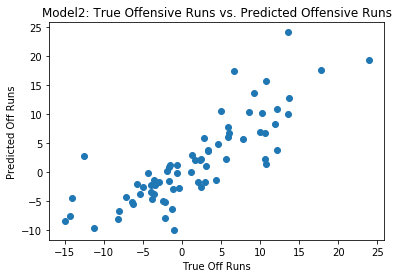

In [72]:
fig, ax = plt.subplots()

ax.scatter(y_test, predicts2)
ax.set_xlabel('True Off Runs')
ax.set_ylabel('Predicted Off Runs')
ax.set_title('Model2: True Offensive Runs vs. Predicted Offensive Runs');

In [73]:
pick2 = open('2ndLR_model.pickle', 'wb')
pickle.dump(model2, pick2)
pick2.close()

In [74]:
df.describe()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,...,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid,BB/K
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.00000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,46.975352,183.225352,6.975352,23.654930,22.809859,2.338028,0.090232,0.217690,0.18675,0.296609,...,0.329176,0.442074,0.327641,102.820423,0.020775,1.391197,-0.296127,0.716197,11197.105634,0.452327
std,7.655762,42.752206,4.265412,9.283936,9.988285,2.914294,0.034177,0.064031,0.07230,0.049458,...,0.044559,0.097976,0.050334,33.496366,1.289078,7.976106,3.394188,0.878855,4546.922481,0.219451
min,25.000000,100.000000,0.000000,4.000000,4.000000,0.000000,0.019000,0.029000,0.02100,0.143000,...,0.178000,0.144000,0.150000,-13.000000,-3.900000,-16.300000,-12.600000,-0.900000,785.000000,0.125523
25%,42.000000,146.750000,4.000000,16.000000,15.000000,0.000000,0.064000,0.170750,0.13375,0.263000,...,0.301000,0.371000,0.293000,78.750000,-0.925000,-4.000000,-2.425000,0.000000,7984.250000,0.289735
50%,49.000000,188.000000,6.000000,23.000000,21.000000,1.000000,0.088000,0.220500,0.17800,0.294000,...,0.325500,0.443500,0.329000,102.500000,0.100000,1.300000,-0.100000,0.600000,11792.500000,0.416451
75%,53.000000,218.250000,10.000000,30.000000,31.000000,3.000000,0.111000,0.264750,0.23225,0.330000,...,0.359250,0.505500,0.362000,125.000000,0.800000,6.025000,1.800000,1.200000,14556.250000,0.568012
max,57.000000,259.000000,21.000000,50.000000,52.000000,18.000000,0.220000,0.396000,0.45100,0.440000,...,0.464000,0.754000,0.488000,212.000000,3.600000,34.600000,12.400000,4.400000,20123.000000,1.383648


In [75]:
df[df['WAR'] >= cuts[2]].describe()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,...,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid,BB/K
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,51.088608,213.607595,10.772152,32.734177,32.417722,3.139241,0.101646,0.198127,0.247785,0.322519,...,0.370468,0.539203,0.379658,137.569620,0.420253,10.473418,0.898734,1.831646,11839.860759,0.561166
std,4.969625,32.479350,4.257571,7.356680,7.904247,3.253141,0.039563,0.062298,0.068913,0.045794,...,0.033940,0.072515,0.032495,21.811949,1.271319,6.048876,3.424029,0.573237,4372.704769,0.262034
min,35.000000,118.000000,3.000000,17.000000,12.000000,0.000000,0.031000,0.064000,0.117000,0.197000,...,0.292000,0.415000,0.316000,100.000000,-3.000000,-0.400000,-6.900000,1.200000,2136.000000,0.167213
25%,49.500000,197.500000,7.000000,27.500000,27.000000,1.000000,0.071500,0.156500,0.198500,0.294000,...,0.347000,0.490500,0.357000,122.000000,-0.400000,6.300000,-0.850000,1.500000,9860.500000,0.365154
50%,52.000000,220.000000,11.000000,33.000000,32.000000,2.000000,0.097000,0.192000,0.243000,0.322000,...,0.369000,0.533000,0.376000,134.000000,0.500000,9.100000,0.500000,1.700000,12371.000000,0.541401
75%,55.000000,237.500000,14.000000,37.500000,36.000000,4.000000,0.126000,0.236500,0.282000,0.351500,...,0.393000,0.572000,0.397500,151.500000,1.300000,13.650000,2.500000,2.100000,14695.500000,0.705038
max,57.000000,259.000000,21.000000,50.000000,52.000000,18.000000,0.220000,0.356000,0.451000,0.432000,...,0.464000,0.754000,0.488000,212.000000,3.500000,34.600000,12.400000,4.400000,19326.000000,1.383648


In [78]:
df[(df['WAR'] < cuts[2]) & (df['WAR'] >= cuts[1])].describe()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,...,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid,BB/K
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,46.902778,183.819444,7.138889,24.361111,22.430556,2.277778,0.090056,0.220611,0.195514,0.309597,...,0.340292,0.461083,0.340264,111.333333,0.056944,2.516667,-0.048611,0.852778,10974.638889,0.440955
std,7.428836,40.493549,3.118801,7.377746,7.214669,2.753856,0.031584,0.058682,0.054533,0.047792,...,0.028740,0.057981,0.026685,17.160387,1.341623,3.646221,3.654170,0.179178,4512.492776,0.198659
min,27.000000,106.000000,2.000000,8.000000,10.000000,0.000000,0.030000,0.106000,0.079000,0.196000,...,0.268000,0.352000,0.272000,67.000000,-3.200000,-6.100000,-7.300000,0.600000,2151.000000,0.125523
25%,42.750000,153.000000,4.000000,20.000000,16.750000,0.000000,0.065750,0.181750,0.151500,0.280750,...,0.319500,0.423000,0.324500,99.000000,-0.925000,-0.600000,-2.850000,0.700000,7943.500000,0.299922
50%,49.000000,188.000000,7.000000,24.000000,21.000000,1.000000,0.088000,0.219500,0.186000,0.310000,...,0.339000,0.457000,0.341000,112.000000,-0.100000,2.500000,0.450000,0.900000,10859.500000,0.418073
75%,53.000000,219.750000,10.000000,30.000000,27.000000,3.000000,0.111250,0.265000,0.233000,0.340500,...,0.360250,0.505500,0.356000,124.000000,1.125000,5.050000,1.900000,1.000000,14533.750000,0.576981
max,57.000000,248.000000,15.000000,37.000000,39.000000,12.000000,0.168000,0.366000,0.349000,0.440000,...,0.418000,0.619000,0.395000,151.000000,3.400000,10.600000,12.100000,1.100000,20123.000000,1.062992


In [79]:
df[(df['WAR'] < cuts[1]) & (df['WAR'] >= cuts[0])].describe()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,...,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid,BB/K
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,45.870130,172.805195,5.558442,19.961039,19.311688,2.142857,0.085130,0.222052,0.164429,0.290052,...,0.314571,0.409338,0.310000,90.727273,-0.057143,-2.035065,-1.254545,0.245455,10934.311688,0.407303
std,8.185916,39.517164,3.147654,6.296285,8.070837,2.836391,0.031188,0.058727,0.053214,0.037262,...,0.023213,0.061671,0.024148,16.533567,1.102322,3.435678,3.159636,0.192317,4567.640172,0.181511
min,25.000000,100.000000,0.000000,8.000000,5.000000,0.000000,0.020000,0.085000,0.055000,0.208000,...,0.254000,0.280000,0.252000,52.000000,-2.400000,-10.200000,-12.600000,0.000000,785.000000,0.140187
25%,41.000000,144.000000,3.000000,15.000000,14.000000,0.000000,0.059000,0.181000,0.123000,0.263000,...,0.299000,0.357000,0.293000,79.000000,-1.000000,-4.400000,-3.800000,0.000000,7996.000000,0.275862
50%,48.000000,173.000000,5.000000,20.000000,19.000000,1.000000,0.086000,0.236000,0.170000,0.289000,...,0.312000,0.413000,0.311000,92.000000,0.000000,-1.700000,-0.900000,0.200000,11615.000000,0.391753
75%,52.000000,205.000000,7.000000,25.000000,22.000000,3.000000,0.102000,0.268000,0.200000,0.317000,...,0.325000,0.455000,0.325000,100.000000,0.700000,0.100000,1.000000,0.400000,14221.000000,0.480226
max,56.000000,249.000000,15.000000,34.000000,49.000000,14.000000,0.161000,0.345000,0.322000,0.367000,...,0.366000,0.550000,0.362000,125.000000,3.000000,5.200000,4.700000,0.500000,19611.000000,1.000000


In [83]:
df[(df['WAR'] < cuts[0])].describe()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,...,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid,BB/K
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,42.785714,153.928571,3.357143,15.017857,14.553571,1.553571,0.081375,0.235536,0.120071,0.252375,...,0.276714,0.325625,0.262286,59.482143,-0.482143,-8.157143,-0.982143,-0.385714,10937.732143,0.375318
std,7.669809,35.800892,2.186143,5.251809,6.943721,2.485739,0.029241,0.073954,0.041648,0.038825,...,0.032558,0.054856,0.030555,19.855836,1.326116,3.546720,2.779019,0.240022,4829.527346,0.167008
min,28.000000,103.000000,0.000000,4.000000,4.000000,0.000000,0.019000,0.029000,0.021000,0.143000,...,0.178000,0.144000,0.150000,-13.000000,-3.900000,-16.300000,-8.700000,-0.900000,1433.000000,0.145119
25%,37.500000,124.750000,2.000000,11.000000,9.750000,0.000000,0.058000,0.180250,0.089750,0.232000,...,0.260750,0.293750,0.249250,49.750000,-1.425000,-10.525000,-2.425000,-0.600000,7014.000000,0.244310
50%,42.500000,145.500000,3.000000,13.000000,13.500000,1.000000,0.078500,0.238500,0.118500,0.255000,...,0.280000,0.326000,0.266000,62.500000,-0.250000,-8.450000,-1.350000,-0.400000,12080.500000,0.351758
75%,49.000000,181.250000,5.000000,19.000000,17.000000,2.000000,0.104000,0.283000,0.149250,0.279750,...,0.301250,0.369250,0.283000,72.500000,0.300000,-4.875000,0.625000,-0.100000,15011.000000,0.433791
max,55.000000,225.000000,10.000000,28.000000,31.000000,14.000000,0.143000,0.396000,0.219000,0.343000,...,0.341000,0.456000,0.313000,97.000000,3.600000,-2.400000,6.400000,-0.100000,17736.000000,1.000000


In [85]:
df['BB/K Percentile'] = df['BB/K'].rank(pct=True)

In [90]:
df[['Name', 'BB/K Percentile']].head(25)

,Name,BB/K Percentile
0,Cody Bellinger,0.989437
1,Mike Trout,1.000000
2,Christian Yelich,0.964789
3,Paul DeJong,0.866197
4,Alex Bregman,0.992958
5,George Springer,0.739437
6,Joey Gallo,0.732394
7,Jorge Polanco,0.859155
8,Xander Bogaerts,0.834507
9,Javier Baez,0.084507
